## Contour Plots for Lambda

In [11]:
import matplotlib.pyplot as plt

In [12]:
%run src/ssy_monte_carlo_test.py

In [13]:
s = SSY()
dot_loc = s.ψ, s.μ_c

In [14]:
ssy_compute_stat = ssy_function_factory(s, parallelization_flag=False)

In [15]:
ssy_compute_stat()

0.9993921177966248

In [16]:
def stability_plot(R, 
                   x, y, 
                   xlb, ylb, 
                   dot_loc=None,
                   file_name='ssy',
                   coords=(-225, 30)):

    text = "Schorfheide, Song and Yaron"

    param1_value, param2_value = dot_loc

    fig, ax = plt.subplots(figsize=(10, 5.7))

    cs1 = ax.contourf(x, y, R.T, alpha=0.5)

    ctr1 = ax.contour(x, y, R.T, levels=[1.0])

    plt.clabel(ctr1, inline=1, fontsize=13)
    plt.colorbar(cs1, ax=ax)

    ax.annotate(text, 
                xy=(param1_value, param2_value),  
                xycoords="data",
                xytext=coords,
                textcoords="offset points",
                fontsize=12,
                arrowprops={"arrowstyle" : "->"})

    ax.plot([param1_value], [param2_value],  "ko", alpha=0.6)

    ax.set_xlabel(xlb, fontsize=16)
    ax.set_ylabel(ylb, fontsize=16)

    plt.savefig(file_name)
    plt.show()

In [17]:
G = 12  # Grid size

In [18]:
psi_vec = np.linspace(1.01, 4.0, G)
mu_vec = np.linspace(0.001, 0.004, G)

In [16]:
R = np.empty((G, G))
init_state = np.zeros(3)

In [17]:
for i, ψ in enumerate(psi_vec):
    for j, μ_c in enumerate(mu_vec):
        s.ψ = ψ
        s.μ_c = μ_c
        ssy_compute_stat = ssy_function_factory(s)
        R[i, j] = ssy_compute_stat(n=3000, m=1000)


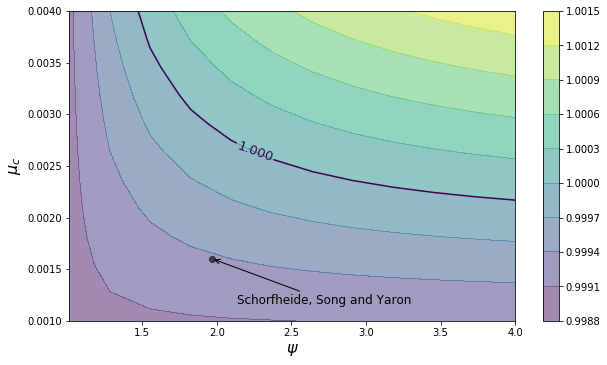

In [43]:
stability_plot(R, 
               psi_vec, mu_vec,
               "$\psi$", "$\mu_c$", 
               file_name='ssy1.pdf',
               dot_loc=dot_loc,
               coords=(25, -45))

Now let's look at a different set of parameters:

In [37]:
G = 5

In [43]:
beta_vec = np.linspace(0.997, 0.9999, G)
psi_vec = np.linspace(1.25, 3.5, G)

In [44]:
s = SSY()
dot_loc = s.β, s.ψ

In [45]:
R = np.empty((G, G))
init_state = np.zeros(3)

In [46]:
for i, ψ in enumerate(psi_vec):
    for j, β in enumerate(beta_vec):
        s.ψ = ψ
        s.β = β
        ssy_compute_stat = ssy_function_factory(s)
        R[i, j] = ssy_compute_stat(n=1000, m=1000)


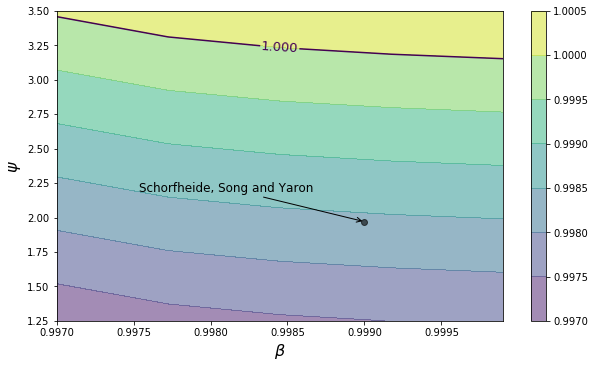

In [47]:
stability_plot(R, 
               beta_vec, psi_vec, 
               "$\\beta$", "$\psi$", 
               file_name='ssy2.pdf',
                dot_loc=dot_loc)

### Prob one bound plots

In [5]:
%run src/ssy_prob_one_test.py

In [8]:
s = SSY()
dot_loc = s.ψ, s.μ_c

In [19]:
R = np.empty((G, G))
init_state = np.zeros(3)

In [20]:
psi_vec = np.linspace(1.01, 4.0, G)
mu_vec = np.linspace(0.001, 0.004, G)

In [23]:
for i, ψ in enumerate(psi_vec):
    for j, μ_c in enumerate(mu_vec):
        s.ψ = ψ
        s.μ_c = μ_c
        R[i, j] = ssy_prob_one_test_val(s, eta_hat=2.0)


In [24]:
R

array([[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]])

In [29]:
ssy_prob_one_test_val(s, eta_hat=1.0)

3.333619801009073e+62